In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [22]:
data=pd.read_csv('Employee_Data.csv')

In [24]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [26]:
data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

<b>Research & Developmen is having most employees</b> 


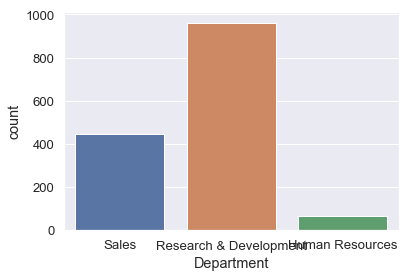

In [27]:
#plt.figure(figsize=(20,10))
sns.countplot(data['Department'])

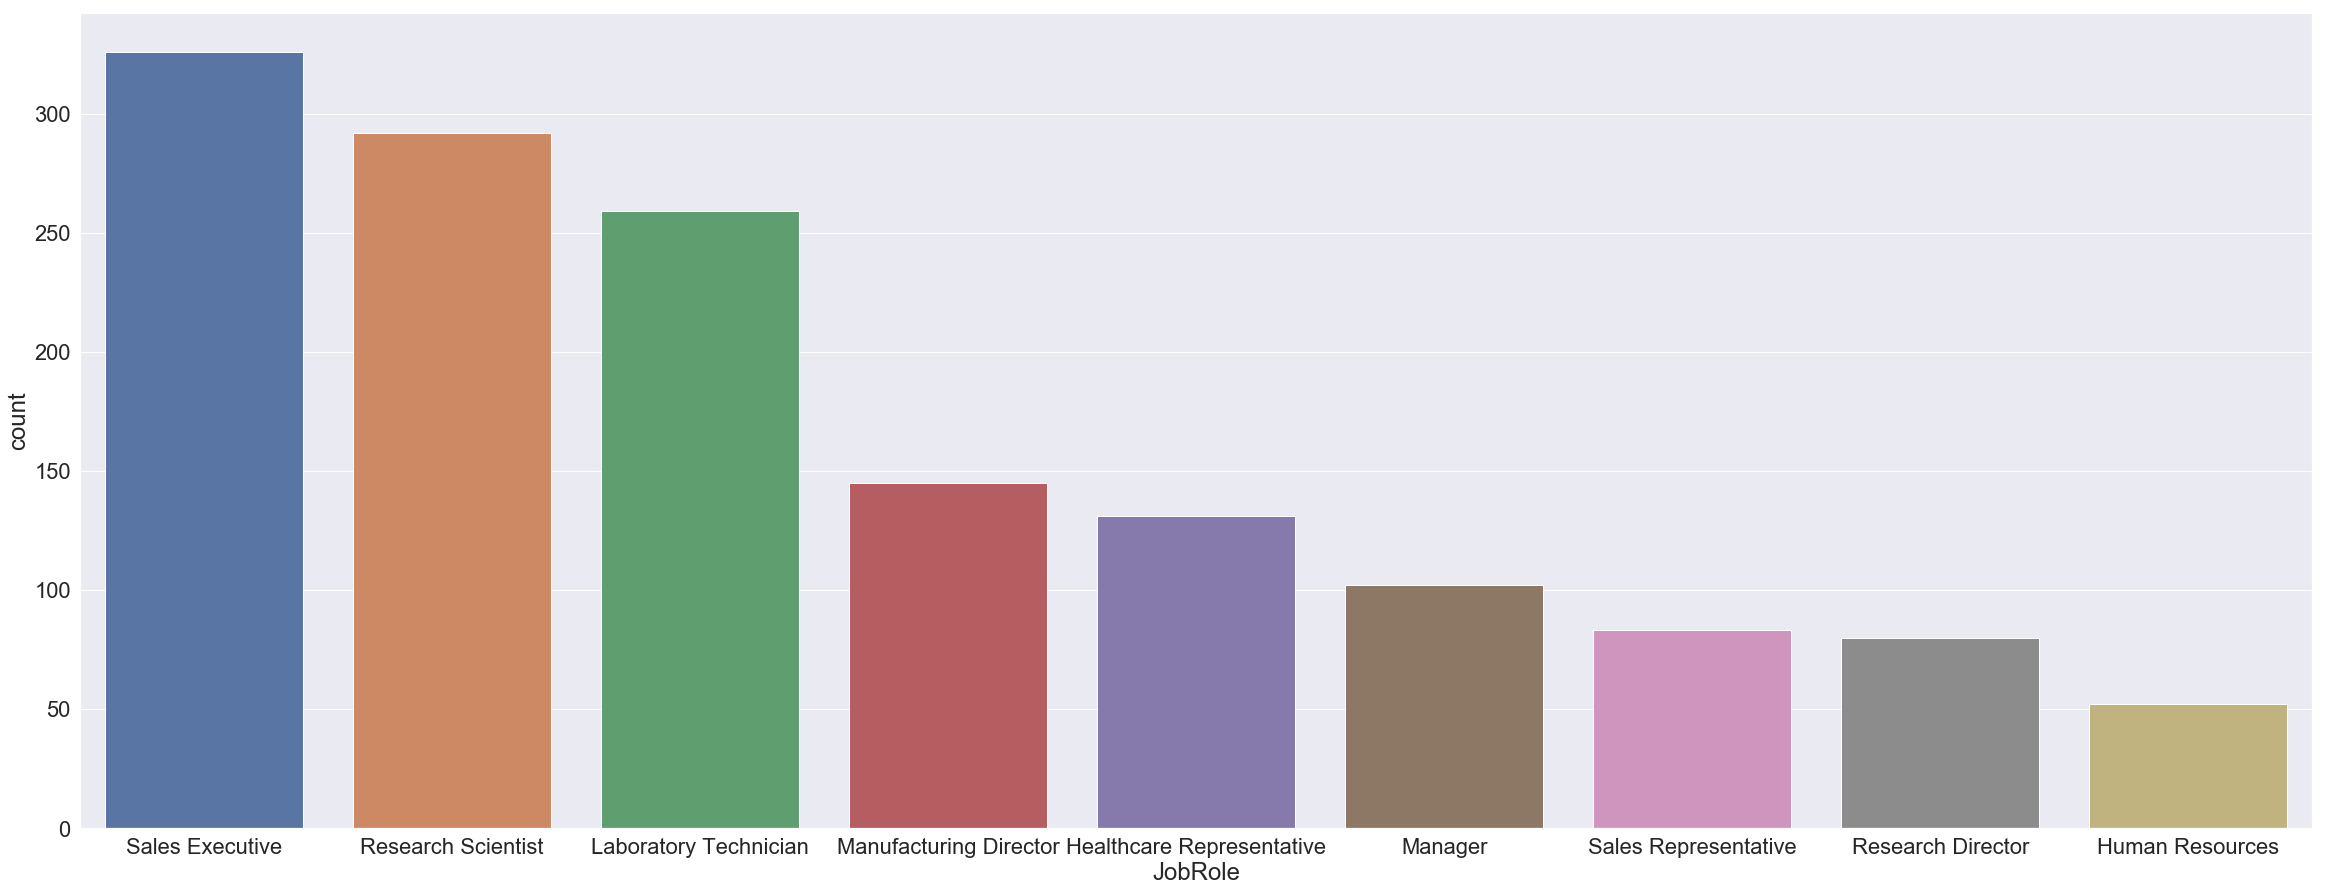

In [28]:
plt.figure(figsize=(40,15))
sns.set(font_scale=2)
sns.countplot(data['JobRole'],label='big')

In [29]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


We notice that <b>'EmployeeCount', 'Over18', 'StandardHours'</b> have only one unique values and <b>'EmployeeNumber'</b> has 1470 unique values. This features aren't useful for us, So we are going to drop those columns.

In [30]:
print(data['Over18'].unique())

['Y']


In [31]:
data.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'],axis='columns',inplace=True)

In [32]:
object_col=[]
for columns in data.columns:
    if (data[columns].dtype==object) and len(data[columns].unique())<=30:
        object_col.append(columns)
        print(f"{columns} : {data[columns].unique()}")

Attrition : ['Yes' 'No']
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department : ['Sales' 'Research & Development' 'Human Resources']
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender : ['Female' 'Male']
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus : ['Single' 'Married' 'Divorced']
OverTime : ['Yes' 'No']


In [33]:
object_col

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [34]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
data["Attrition"] = label.fit_transform(data.Attrition)

In [35]:
#data["Attrition"].head()

<b>Numerical Features</b>

In [36]:
disc_col=[]
for column in data.columns:
    if data[column].dtype!=object and data[column].nunique()<30:
        print(f"{column}:{data[column].unique()}")
        print(data[column].value_counts())
        disc_col.append(column)
        print("=============")
disc_col.remove('Attrition')

Attrition:[1 0]
0    1233
1     237
Name: Attrition, dtype: int64
DistanceFromHome:[ 1  8  2  3 24 23 27 16 15 26 19 21  5 11  9  7  6 10  4 25 12 18 29 22
 14 20 28 17 13]
2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
29     27
23     27
18     26
15     26
20     25
25     25
26     25
28     23
19     22
14     21
12     20
17     20
13     19
22     19
21     18
27     12
Name: DistanceFromHome, dtype: int64
Education:[2 1 4 3 5]
3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64
EnvironmentSatisfaction:[2 3 4 1]
3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64
JobInvolvement:[3 2 4 1]
3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64
JobLevel:[2 1 3 4 5]
1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64
JobSatisfaction:[4 2 3 1]
4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64


In [37]:
cont_col=[]
for column in data.columns:
    if data[column].dtypes!=object and data[column].nunique()>25:
        print(f"{column}:Minimum:{data[column].min()},Maximum:{data[column].max()}")
        cont_col.append(column)
        print("==================")


Age:Minimum:18,Maximum:60
DailyRate:Minimum:102,Maximum:1499
DistanceFromHome:Minimum:1,Maximum:29
HourlyRate:Minimum:30,Maximum:100
MonthlyIncome:Minimum:1009,Maximum:19999
MonthlyRate:Minimum:2094,Maximum:26999
TotalWorkingYears:Minimum:0,Maximum:40
YearsAtCompany:Minimum:0,Maximum:40


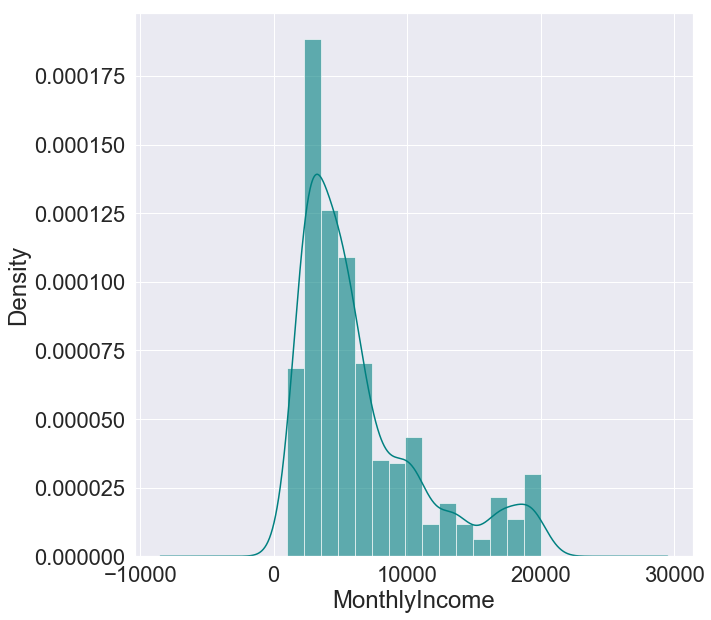

In [38]:
plt.figure(figsize=(10,10))
data['MonthlyIncome'].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
data["MonthlyIncome"].plot(kind='density', color='teal')
plt.xlabel('MonthlyIncome')
plt.show()

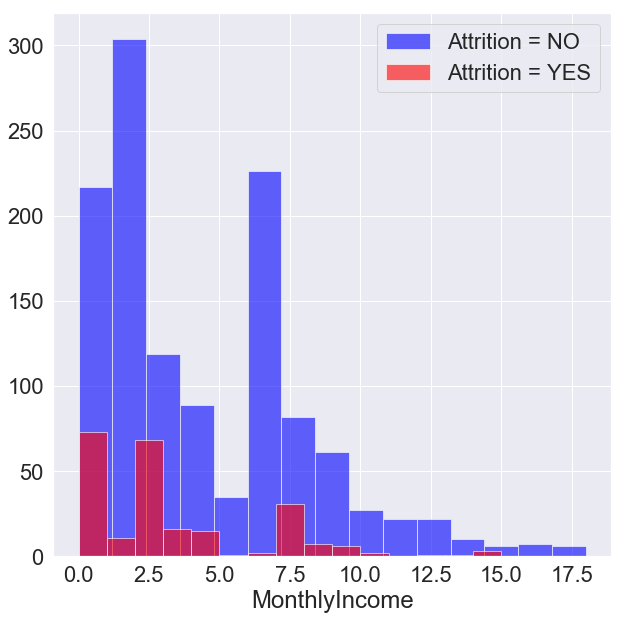

In [39]:
plt.figure(figsize=(10,10))
data[data["Attrition"] == 0]['YearsInCurrentRole'].hist(bins=15, color='blue', label='Attrition = NO', alpha=0.6)
data[data["Attrition"] == 1]['YearsInCurrentRole'].hist(bins=15, color='red', label='Attrition = YES', alpha=0.6)
plt.legend()
plt.xlabel('MonthlyIncome')
plt.show()

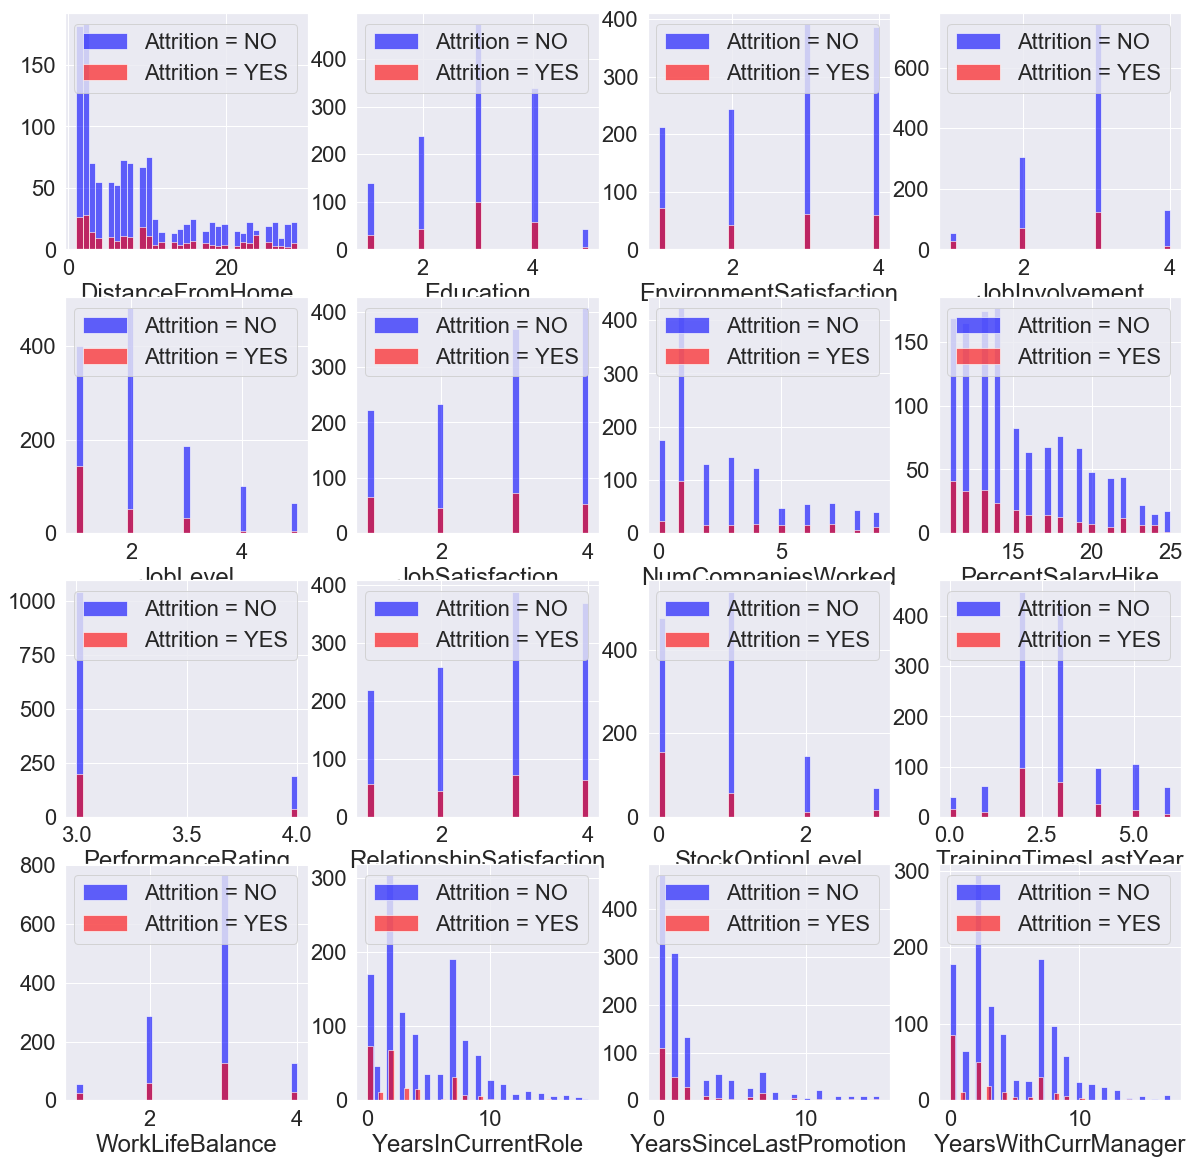

In [40]:
plt.figure(figsize=(20, 20))

for i, column in enumerate(disc_col, 1):
    plt.subplot(4, 4, i)
    data[data["Attrition"] == 0][column].hist(bins=35, color='blue', label='Attrition = NO', alpha=0.6)
    data[data["Attrition"] == 1][column].hist(bins=35, color='red', label='Attrition = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

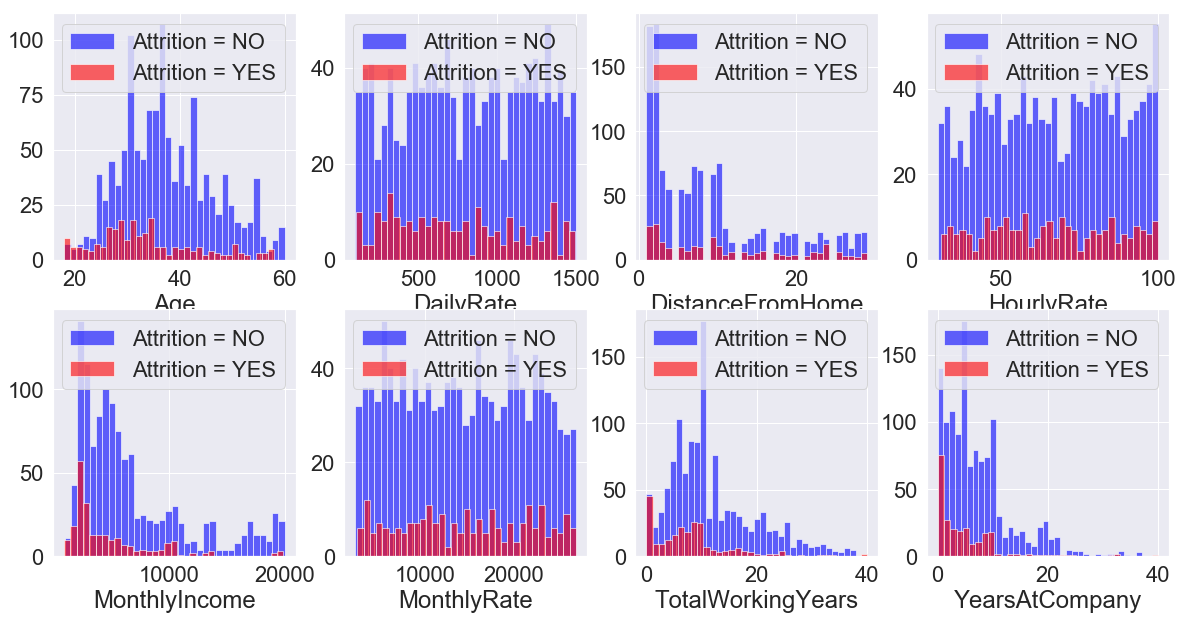

In [41]:
plt.figure(figsize=(20, 10))
for i, column in enumerate(cont_col, 1):
    plt.subplot(2, 4, i)
    data[data["Attrition"] == 0][column].hist(bins=35, color='blue', label='Attrition = NO', alpha=0.6)
    data[data["Attrition"] == 1][column].hist(bins=35, color='red', label='Attrition = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)
    

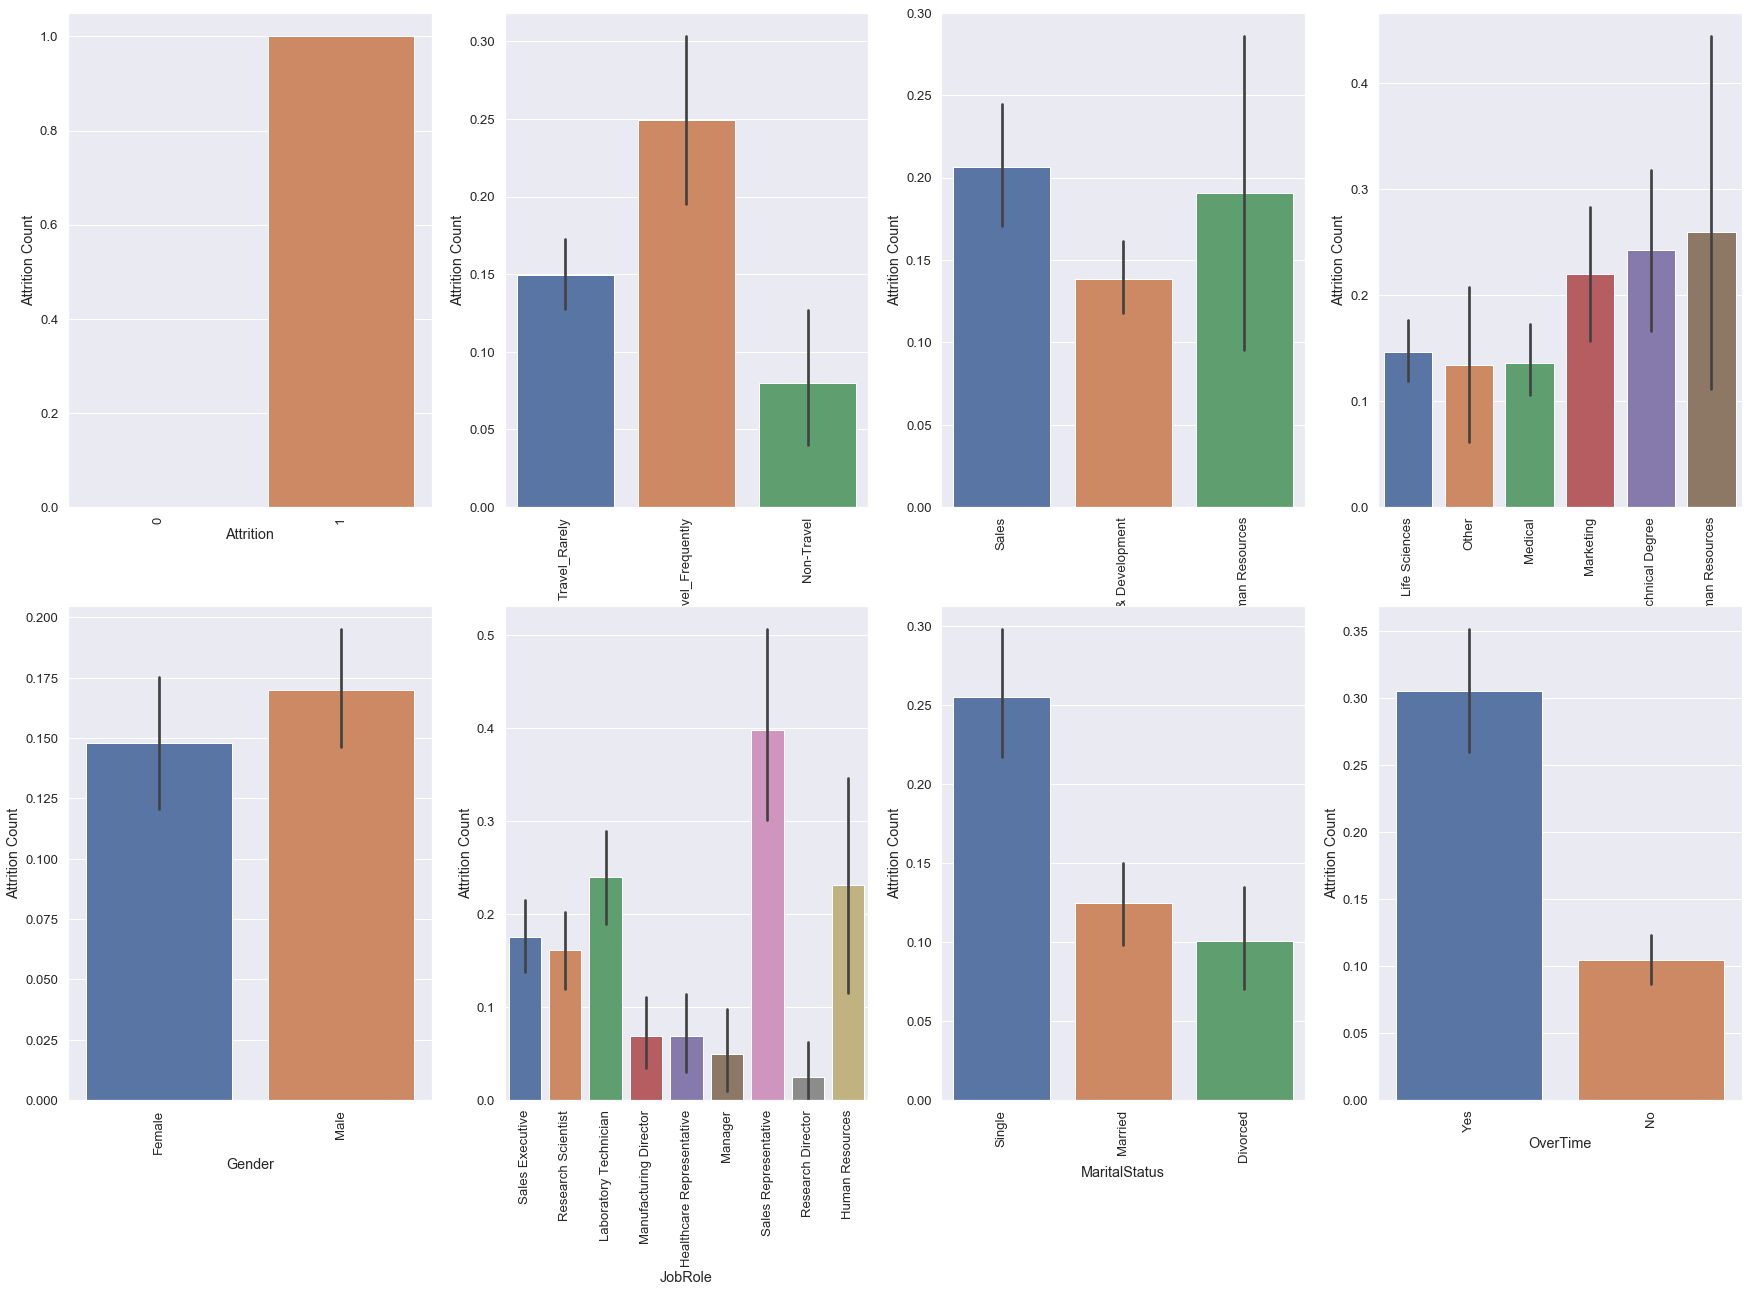

In [42]:
# Plotting how every feature correlate with the "target"
sns.set(font_scale=1.2)
plt.figure(figsize=(30, 20))
for i, column in enumerate(object_col, 1):
    plt.subplot(2, 4, i)
    g = sns.barplot(x=f"{column}", y='Attrition', data=data)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    plt.ylabel('Attrition Count')
    plt.xlabel(f'{column}')

<b>Data Processing</b>

In [43]:
for column in object_col:
    data[column] = label.fit_transform(data[column])

In [44]:
data.shape

(1470, 31)

In [45]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


In [46]:
col_2 = data.corr().nlargest(20, "Attrition").Attrition.index
print(col_2)

Index(['Attrition', 'OverTime', 'MaritalStatus', 'DistanceFromHome', 'JobRole',
       'Department', 'NumCompaniesWorked', 'Gender', 'EducationField',
       'MonthlyRate', 'PerformanceRating', 'BusinessTravel', 'HourlyRate',
       'PercentSalaryHike', 'Education', 'YearsSinceLastPromotion',
       'RelationshipSatisfaction', 'DailyRate', 'TrainingTimesLastYear',
       'WorkLifeBalance'],
      dtype='object')


In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier


In [48]:
tree_params = {"criterion":("gini", "entropy"), 
          "splitter":("best", "random"), 
          "max_depth":(list(range(1, 20))), 
          "min_samples_split":[2, 3, 4], 
          "min_samples_leaf":list(range(1, 20)), 
          }

In [49]:
X = data[col_2].drop("Attrition", axis="columns")
y = data.Attrition
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
tree = DecisionTreeClassifier(max_depth=5, random_state=17)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
accuracy_score(y_test, y_pred)

0.8321995464852607

In [50]:
tree_grid = GridSearchCV(tree, tree_params,cv=5, n_jobs=-1, verbose=True)
tree_grid.fit(X_train, y_train)



Fitting 5 folds for each of 4332 candidates, totalling 21660 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 2274 tasks      | elapsed:   22.5s
[Parallel(n_jobs=-1)]: Done 6274 tasks      | elapsed:   46.7s
[Parallel(n_jobs=-1)]: Done 11874 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 19074 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 21660 out of 21660 | elapsed:  2.3min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'criterion': ('gini', 'entropy'), 'splitter': ('best', 'random'), 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'min_samples_split': [2, 3, 4], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [51]:
tree_grid.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'min_samples_leaf': 16,
 'min_samples_split': 2,
 'splitter': 'random'}

In [52]:
tree_grid.best_score_

0.8454810495626822

In [53]:
tree_grid.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=16, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='random')

In [54]:
accuracy_score(y_test, tree_grid.predict(X_test))

0.8616780045351474